In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
set.seed(2025)

students = tibble(Student_ID = 1:30,
                  Math = sample(30:90, 30, replace = TRUE),
                  English = sample(50:100, 30, replace = TRUE),
                  Science = sample(45:95, 30, replace = TRUE))

In [5]:
students = students %>% mutate(Avg_Score = (Math + English + Science)/3,
                               Grade = ifelse(Avg_Score >= 80, 'A', 
                                       ifelse(Avg_Score >= 70, 'B', 
                                       ifelse(Avg_Score >= 60, 'C', 'F'))),
                               Passed = ifelse(Avg_Score >= 60, 'Passed', 'Failed'),
                               Flag = ifelse(Math < 60 | English < 60 | Science < 60, 'Need Help', 'Good'))

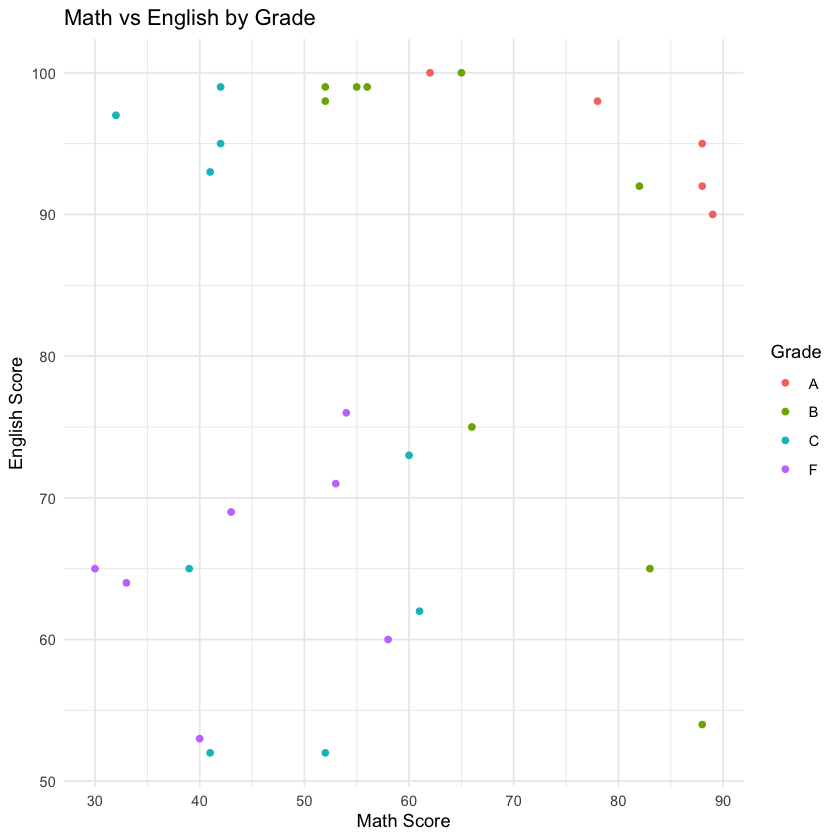

In [37]:
ggplot(students, aes(x = Math, y = English, color = Grade)) +
geom_point() +
labs(title = "Math vs English by Grade",
     x = "Math Score",
     y = "English Score") +
theme_minimal()

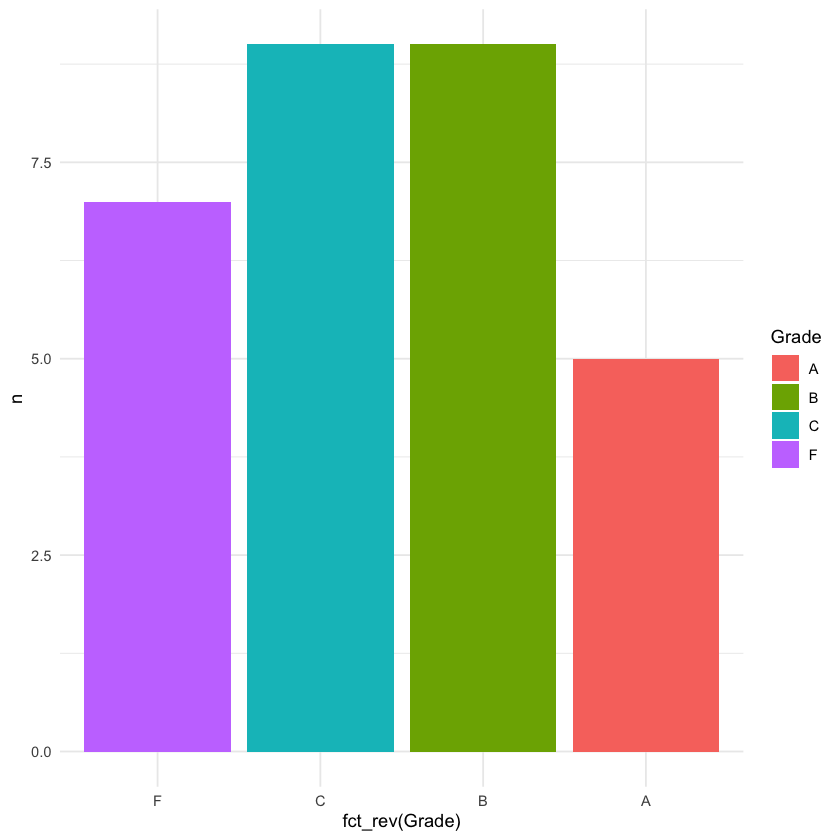

In [51]:
students %>%
count(Grade) %>%
ggplot(aes(x = fct_rev(Grade), y = n, fill = Grade)) +
geom_col() +
theme_minimal()

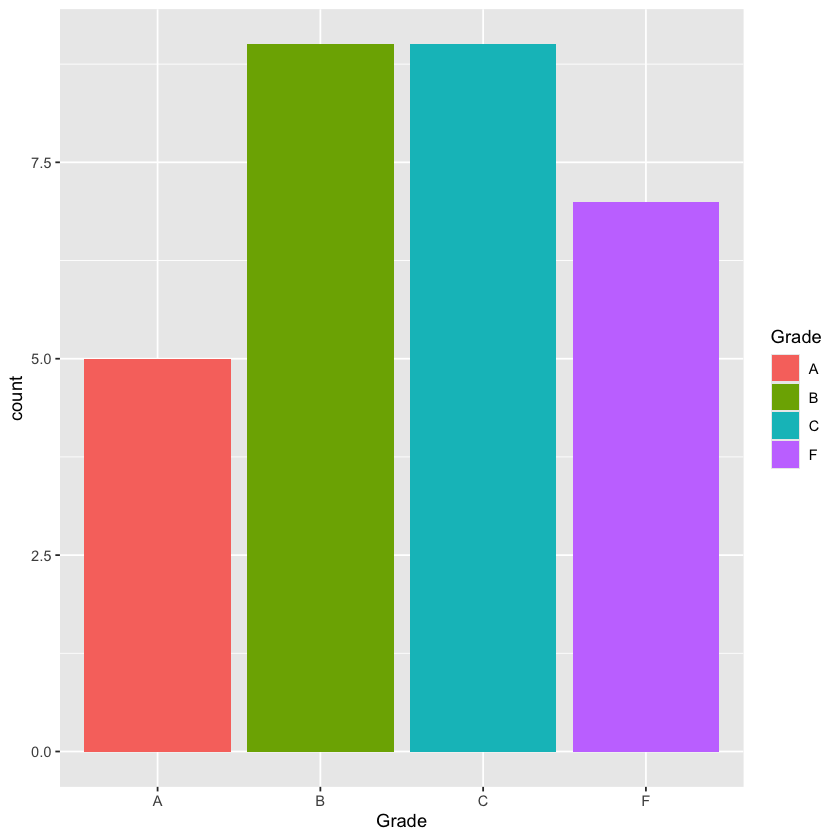

In [49]:
ggplot(students, aes(x = Grade, fill = Grade)) +
geom_bar()

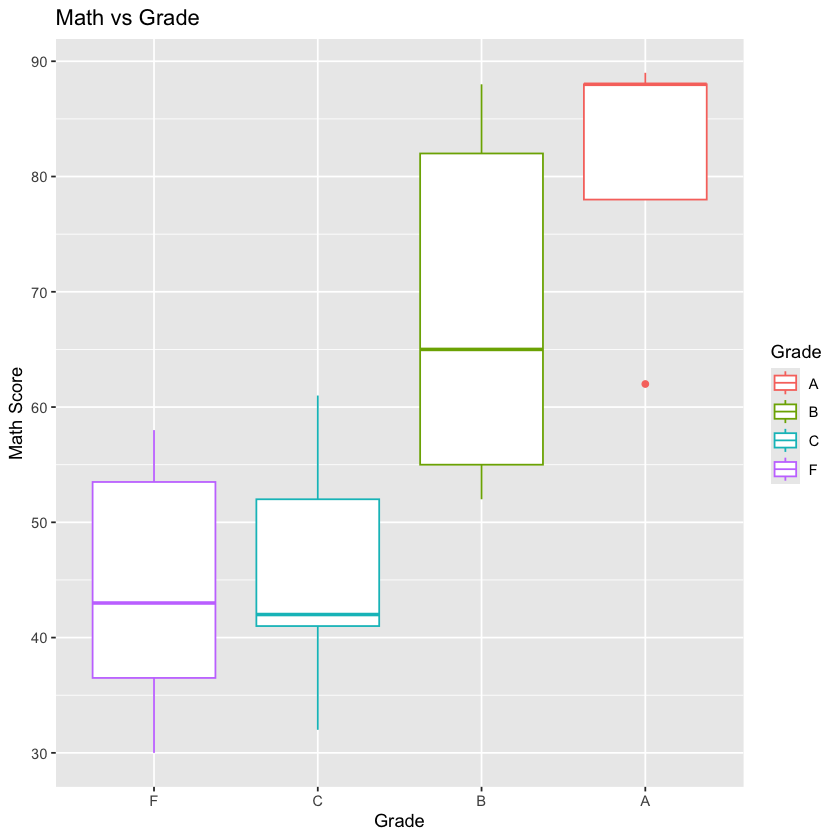

In [65]:
ggplot(students, aes(x = fct_rev(Grade), y = Math, color = Grade)) +
labs(title = "Math vs Grade",
     x = "Grade",
     y = "Math Score") +
geom_boxplot()

In [69]:
library(patchwork)

In [109]:
p1 = ggplot(students, aes(x = fct_rev(Grade), y = Math, color = Grade)) +
     geom_boxplot() + 
     labs(x = 'Grade', y = '', title = "Math")
p2 = ggplot(students, aes(x = fct_rev(Grade), y = English, color = Grade)) +
     geom_boxplot() + 
     labs(x = 'Grade', y = '', title = "English")
p3 = ggplot(students, aes(x = fct_rev(Grade), y = Science, color = Grade)) +
     geom_boxplot() + 
     labs(x = 'Grade', y = '', title = "Science")

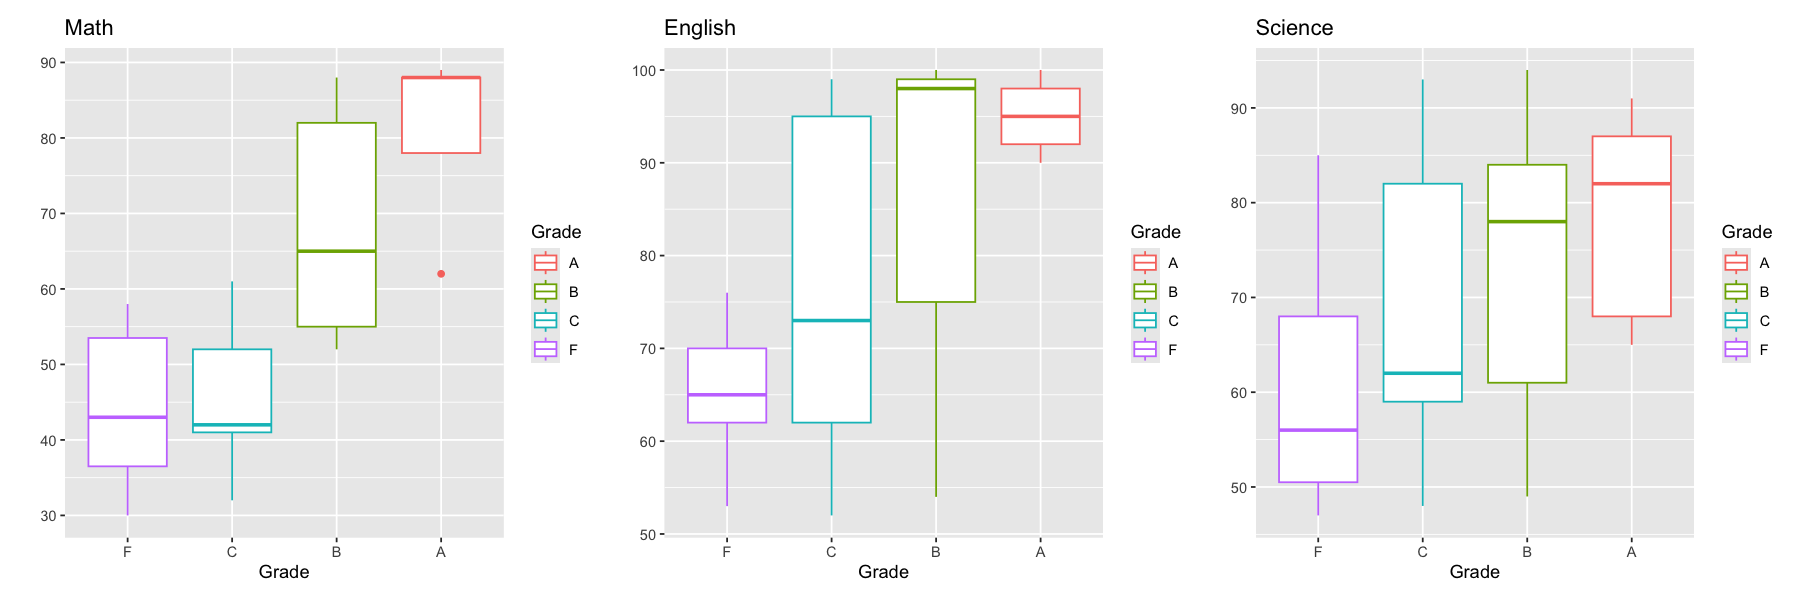

In [120]:
options(repr.plot.width = 15, repr.plot.height = 5)
p1 + p2 + p3